<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/brain_tumer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import pandas as pd
import opendatasets as od
import pathlib
from pathlib import Path
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
od.download('www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/croissant/download')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adithyankm
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:00<00:00, 121MB/s]


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/brain-tumor-classification-mri/Training/no_tumor"

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

num_images_to_generate = 820 - len(image_files)

i = 0
for image_file in image_files:
    if i >= num_images_to_generate:
        break
    img = cv2.imread(os.path.join(data_dir, image_file))
    img = img.reshape((1,) + img.shape)

    save_dir = data_dir
    for batch in datagen.flow(img, batch_size=1, save_to_dir=save_dir, save_prefix='augmented_', save_format='jpg'):
        i += 1
        if i >= num_images_to_generate:
            break
        break

In [ ]:
import os

main_dir = "/content/brain-tumor-classification-mri/Training"
subdirs = os.listdir(main_dir)
image_extensions = (".jpg", ".jpeg", ".png", ".gif", ".bmp")

for subdir in subdirs:
    path = os.path.join(main_dir, subdir)
    image_count = 0
    for filename in os.listdir(path):
        if filename.lower().endswith(image_extensions):
            image_count += 1
    print(f"There are {image_count} images in the '{subdir}' directory.")

There are 826 images in the 'glioma_tumor' directory.
There are 785 images in the 'no_tumor' directory.
There are 822 images in the 'meningioma_tumor' directory.
There are 827 images in the 'pituitary_tumor' directory.


In [ ]:
X=[]
Y=[]
for sub in subdirs:
  path=os.path.join(main_dir,sub)
  for filename in os.listdir(path):
     if filename.endswith(".jpg"):
        image = cv2.imread(os.path.join(path, filename))
        resized_image=cv2.resize(image,(48,48))
        X.append(resized_image)
        if sub=="glioma_tumor":
          Y.append(0)
        elif sub=="meningioma_tumor":
          Y.append(1)
        elif sub=="no_tumor":
          Y.append(2)
        elif sub=="pituitary_tumor":
          Y.append(3)


In [ ]:
X_np=np.array(X)/255.0
Y_np=np.array(Y)

In [ ]:
X_np.shape,Y_np.shape


((3260, 48, 48, 3), (3260,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_np,Y_np, test_size=0.2,random_state=42)

In [ ]:
from keras import regularizers
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(48,48,3)),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),



    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(4,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 691,716 (2.64 MB)

 Trainable params: 691,716 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.3763 - loss: 3.0475 - val_accuracy: 0.5844 - val_loss: 1.4421
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6006 - loss: 1.3009 - val_accuracy: 0.6794 - val_loss: 1.1232
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6705 - loss: 1.0187 - val_accuracy: 0.7408 - val_loss: 0.8391
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7295 - loss: 0.8535 - val_accuracy: 0.7623 - val_loss: 0.7516
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7502 - loss: 0.8158 - val_accuracy: 0.8160 - val_loss: 0.6762
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7880 - loss: 0.7010 - val_accuracy: 0.8298 - val_loss: 0.6304
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8097 - loss: 0.6649 - val_accuracy: 0.8328 - val_loss: 0.6359
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.6131 - val_accuracy: 0.8696 - val_los

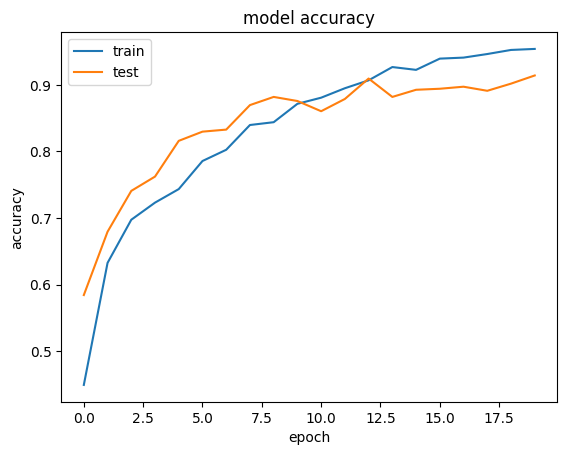

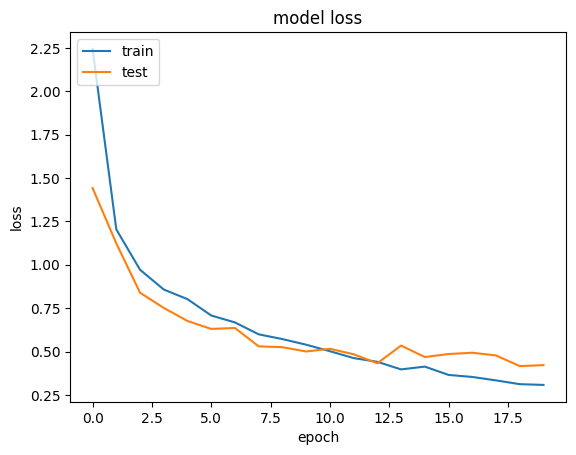

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
print(classification_report(Y_test, Y_pred_classes,target_names=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.96      0.91       197
meningioma_tumor       0.91      0.77      0.84       167
        no_tumor       0.93      0.95      0.94       147
 pituitary_tumor       0.97      0.98      0.98       141

        accuracy                           0.91       652
       macro avg       0.92      0.92      0.92       652
    weighted avg       0.92      0.91      0.91       652

